# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка PyTorch. 

## На сегодняшней лекции мы разберем, зачем нужны фреймворки для глубинного обучения и как устроены базовые методы и классы PyTorch

In [1]:
import IPython
IPython.display.Image("what is pytorch.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

#        Пример обучения нейронной сети в numpy

In [3]:
import numpy as np

In [4]:
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

In [5]:
y.shape

(64, 10)

In [7]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 30149181.478563435
1 27812484.755952343
2 29934278.230542384
3 31482545.054245614
4 28846763.04380813
5 21347573.67295037
6 12901518.321755614
7 6776161.663821597
8 3501023.80906902
9 1956539.2883338844
10 1245013.9779399305
11 891116.4889475506
12 691754.6069565278
13 563083.1831810593
14 470692.9659475256
15 399589.4284045412
16 342515.8800713631
17 295761.2114947209
18 256776.25037049517
19 223977.5182369604
20 196186.6310098339
21 172482.4120059822
22 152164.134199052
23 134660.73063554167
24 119524.02508586075
25 106379.71263330929
26 94928.72646210634
27 84915.80447494336
28 76129.68254225838
29 68398.55661849423
30 61580.630652750144
31 55551.772164592476
32 50209.7491037252
33 45456.98315587548
34 41220.33723598798
35 37440.791915095644
36 34056.99616809058
37 31023.752668759385
38 28297.46869401868
39 25841.98858214981
40 23627.089277817035
41 21626.08046620463
42 19814.484841598118
43 18174.850921816585
44 16686.394583776928
45 15334.106082544822
46 14104.151549340762
47 12

420 9.250431780648807e-06
421 8.809014110911187e-06
422 8.388811797156417e-06
423 7.988728431595721e-06
424 7.607933657083111e-06
425 7.245413692122394e-06
426 6.900341624155499e-06
427 6.571777615300941e-06
428 6.2590448538829206e-06
429 5.961294160733374e-06
430 5.6777517809501474e-06
431 5.4078790626714125e-06
432 5.15091141737623e-06
433 4.906218669525675e-06
434 4.673238144303947e-06
435 4.451415285761939e-06
436 4.240185193244802e-06
437 4.039094966183715e-06
438 3.847586389843926e-06
439 3.665198788802946e-06
440 3.4915453381613647e-06
441 3.326169002756022e-06
442 3.1686816316341683e-06
443 3.0187013770469195e-06
444 2.875900683116539e-06
445 2.7399502273958354e-06
446 2.6104137945445366e-06
447 2.4870386264699324e-06
448 2.369541600076647e-06
449 2.2576320765551264e-06
450 2.1510643893178783e-06
451 2.049554725356969e-06
452 1.952856834471116e-06
453 1.8607808869835399e-06
454 1.773051158795653e-06
455 1.6894882510589881e-06
456 1.6098937779268457e-06
457 1.534080246096314e-06

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от __np.ndarray__, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [8]:
import torch

In [9]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [13]:
x

tensor([[ 0.0000, -0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.0000,  0.0000]])

In [14]:
# Типы
torch.FloatTensor
torch.LongTensor
torch.ByteTensor

torch.ByteTensor

In [15]:
x = torch.Tensor(5, 3).type(torch.FloatTensor)

In [16]:
# инициализируем тензор нормальным распределением
x = torch.randn(5, 3)

In [17]:
x

tensor([[ 2.1650, -0.1562, -1.2153],
        [-1.1600, -0.3914, -1.2911],
        [-0.8139, -0.8465,  0.2319],
        [ 1.3138,  0.0668, -0.2683],
        [-0.8304,  1.1821, -0.2052]])

In [18]:
x.shape

torch.Size([5, 3])

In [19]:
x.size()

torch.Size([5, 3])

In [20]:
y = torch.rand(5, 3)

In [21]:
y

tensor([[0.4704, 0.4820, 0.4149],
        [0.2067, 0.3015, 0.1200],
        [0.8751, 0.6850, 0.8505],
        [0.3213, 0.8485, 0.3164],
        [0.5626, 0.4514, 0.7802]])

In [22]:
# Первый способ сложить 2 тензора
x + y

tensor([[ 2.6354,  0.3257, -0.8005],
        [-0.9533, -0.0899, -1.1711],
        [ 0.0611, -0.1614,  1.0824],
        [ 1.6351,  0.9153,  0.0481],
        [-0.2679,  1.6336,  0.5751]])

In [23]:
# Второй способ сложить 2 тензора
x.add(y)

tensor([[ 2.6354,  0.3257, -0.8005],
        [-0.9533, -0.0899, -1.1711],
        [ 0.0611, -0.1614,  1.0824],
        [ 1.6351,  0.9153,  0.0481],
        [-0.2679,  1.6336,  0.5751]])

In [24]:
# А еще можно так:
torch.add(x, y)

tensor([[ 2.6354,  0.3257, -0.8005],
        [-0.9533, -0.0899, -1.1711],
        [ 0.0611, -0.1614,  1.0824],
        [ 1.6351,  0.9153,  0.0481],
        [-0.2679,  1.6336,  0.5751]])

In [25]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)

tensor([[ 2.6354,  0.3257, -0.8005],
        [-0.9533, -0.0899, -1.1711],
        [ 0.0611, -0.1614,  1.0824],
        [ 1.6351,  0.9153,  0.0481],
        [-0.2679,  1.6336,  0.5751]])

In [26]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[ 2.  2.  2.  2.  2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [27]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [28]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)

tensor([[-0.9411, -1.9948, -0.6836, -0.2472],
        [ 0.1429, -2.6201,  2.3567,  0.3342],
        [-0.4342,  1.4792, -2.0995, -0.2069],
        [ 0.9551,  0.2623,  1.8868,  0.0482],
        [-0.1155,  1.4846, -1.2375,  0.2086]])

In [29]:
# для python 3

a @ b

tensor([[-0.9411, -1.9948, -0.6836, -0.2472],
        [ 0.1429, -2.6201,  2.3567,  0.3342],
        [-0.4342,  1.4792, -2.0995, -0.2069],
        [ 0.9551,  0.2623,  1.8868,  0.0482],
        [-0.1155,  1.4846, -1.2375,  0.2086]])

Поменяем пару строчек в обучении на __numpy__ и код уже можно запускать и на GPU. Например, __x = x.cuda()__

In [30]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 tensor(37089388.)
1 tensor(43565348.)
2 tensor(53563336.)
3 tensor(52954092.)
4 tensor(35002424.)
5 tensor(14994063.)
6 tensor(5311740.5000)
7 tensor(2398334.)
8 tensor(1542681.)
9 tensor(1192569.8750)
10 tensor(981948.4375)
11 tensor(826599.4375)
12 tensor(703279.7500)
13 tensor(602875.)
14 tensor(519867.0312)
15 tensor(450677.7500)
16 tensor(392570.8750)
17 tensor(343469.6250)
18 tensor(301750.8750)
19 tensor(266103.3750)
20 tensor(235468.8594)
21 tensor(209050.4062)
22 tensor(186139.6250)
23 tensor(166203.7656)
24 tensor(148800.1406)
25 tensor(133568.7969)
26 tensor(120178.8516)
27 tensor(108354.9375)
28 tensor(97863.2656)
29 tensor(88571.5078)
30 tensor(80304.6406)
31 tensor(72930.9062)
32 tensor(66337.4688)
33 tensor(60430.1172)
34 tensor(55126.5977)
35 tensor(50354.9297)
36 tensor(46052.2422)
37 tensor(42166.1172)
38 tensor(38656.5625)
39 tensor(35487.6172)
40 tensor(32613.3164)
41 tensor(30000.8711)
42 tensor(27625.9629)
43 tensor(25464.0742)
44 tensor(23491.7695)
45 tensor(21

420 tensor(0.0006)
421 tensor(0.0006)
422 tensor(0.0006)
423 tensor(0.0006)
424 tensor(0.0006)
425 tensor(0.0005)
426 tensor(0.0005)
427 tensor(0.0005)
428 tensor(0.0005)
429 tensor(0.0005)
430 tensor(0.0005)
431 tensor(0.0005)
432 tensor(0.0005)
433 tensor(0.0005)
434 tensor(0.0004)
435 tensor(0.0004)
436 tensor(0.0004)
437 tensor(0.0004)
438 tensor(0.0004)
439 tensor(0.0004)
440 tensor(0.0004)
441 tensor(0.0004)
442 tensor(0.0004)
443 tensor(0.0004)
444 tensor(0.0004)
445 tensor(0.0003)
446 tensor(0.0003)
447 tensor(0.0003)
448 tensor(0.0003)
449 tensor(0.0003)
450 tensor(0.0003)
451 tensor(0.0003)
452 tensor(0.0003)
453 tensor(0.0003)
454 tensor(0.0003)
455 tensor(0.0003)
456 tensor(0.0003)
457 tensor(0.0003)
458 tensor(0.0003)
459 tensor(0.0003)
460 tensor(0.0003)
461 tensor(0.0002)
462 tensor(0.0002)
463 tensor(0.0002)
464 tensor(0.0002)
465 tensor(0.0002)
466 tensor(0.0002)
467 tensor(0.0002)
468 tensor(0.0002)
469 tensor(0.0002)
470 tensor(0.0002)
471 tensor(0.0002)
472 tensor(0

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [11]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [12]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [13]:
x.grad

In [14]:
# производная операции, которая породила переменную.
x.grad_fn

# Задаем граф вычислений: #

In [15]:
y = x + 2
z = y * y * 2
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward1>)

In [16]:
# Запускаем бэкпроп
# На выходе получаем градиенты из хуков
out.backward()

In [17]:
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [18]:
out.grad == None

True

In [19]:
y.grad

# Что произошло?

__autograd__ строит ациклический граф вычисления из переменных и операций (функций)
__out.backward__ проходит по всему графу начиная от вершины out и считает градиенты вершин

В __pyTorch__ начиная с версии 0.3 промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения можно использовать
функцию __variable.register_hook(print)__
или использовать __Variable.retain_grad()__

In [20]:
from __future__ import print_function
x = Variable(torch.ones(2, 2), requires_grad = True)
y.register_hook(print)
y = x + 2
z = y * y * 2
z.register_hook(print)
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward1>)

In [21]:
out.backward()

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [22]:
v = torch.autograd.Variable(torch.randn(3), requires_grad=True)
v2 = v+1
v2.retain_grad()
v2.sum().backward()
v2.grad

tensor([1., 1., 1.])

Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [23]:
f = Variable(torch.Tensor([2,3]), requires_grad=True)
g = f[0] * f[1]
g.backward(retain_graph=True)
f.grad
g.backward()
f.grad

tensor([6., 4.])

In [24]:
f = Variable(torch.Tensor([2,3]), requires_grad=True)
g = f[0] * f[1]
g.backward()
f.grad
g.backward()
f.grad

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [25]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad



tensor([[1., 1.],
        [1., 1.]])

__torch.autograd.Function__ - базовый класс дифференецируемых функций-составных частей графа вычислений

In [26]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input



# Снова вернемся к исходной двухслойной сети

In [27]:
import torch
from torch.autograd import Variable

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)


w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])
    
    # Обнуляем градиенты
    if w1.grad is not None:
        w1.grad.data.zero_()
    if w2.grad is not None:
        w2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

/home/s.evstifeev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


0 tensor(30784914.)
1 tensor(27305544.)
2 tensor(27106540.)
3 tensor(26320072.)
4 tensor(22786992.)
5 tensor(16995584.)
6 tensor(10979059.)
7 tensor(6512436.)
8 tensor(3789139.2500)
9 tensor(2305696.2500)
10 tensor(1514675.3750)
11 tensor(1080446.7500)
12 tensor(824924.3125)
13 tensor(661242.8750)
14 tensor(547111.9375)
15 tensor(462027.3125)
16 tensor(395472.2188)
17 tensor(341645.7188)
18 tensor(297092.4062)
19 tensor(259675.6562)
20 tensor(227951.4531)
21 tensor(200772.6250)
22 tensor(177415.3750)
23 tensor(157226.8750)
24 tensor(139767.5469)
25 tensor(124557.3828)
26 tensor(111254.7266)
27 tensor(99577.7344)
28 tensor(89303.6953)
29 tensor(80232.2891)
30 tensor(72207.0625)
31 tensor(65090.9844)
32 tensor(58780.2969)
33 tensor(53161.5977)
34 tensor(48152.3750)
35 tensor(43674.0039)
36 tensor(39665.3008)
37 tensor(36068.1016)
38 tensor(32834.7539)
39 tensor(29926.7383)
40 tensor(27306.7969)
41 tensor(24947.9199)
42 tensor(22815.1738)
43 tensor(20884.2480)
44 tensor(19135.1992)
45 ten

418 tensor(0.0001)
419 tensor(0.0001)
420 tensor(0.0001)
421 tensor(0.0001)
422 tensor(0.0001)
423 tensor(0.0001)
424 tensor(0.0001)
425 tensor(0.0001)
426 tensor(0.0001)
427 tensor(0.0001)
428 tensor(0.0001)
429 tensor(0.0001)
430 tensor(0.0001)
431 tensor(0.0001)
432 tensor(0.0001)
433 tensor(0.0001)
434 tensor(0.0001)
435 tensor(0.0001)
436 tensor(0.0001)
437 tensor(0.0001)
438 tensor(0.0001)
439 tensor(0.0001)
440 tensor(0.0001)
441 tensor(0.0001)
442 tensor(0.0001)
443 tensor(0.0001)
444 tensor(0.0001)
445 tensor(0.0001)
446 tensor(0.0001)
447 tensor(0.0001)
448 tensor(0.0001)
449 tensor(0.0001)
450 tensor(0.0001)
451 tensor(0.0001)
452 tensor(0.0001)
453 tensor(0.0001)
454 tensor(0.0001)
455 tensor(0.0001)
456 tensor(0.0001)
457 tensor(0.0001)
458 tensor(0.0001)
459 tensor(0.0001)
460 tensor(0.0001)
461 tensor(0.0001)
462 tensor(0.0001)
463 tensor(0.0001)
464 tensor(0.0001)
465 tensor(0.0001)
466 tensor(0.0001)
467 tensor(0.0001)
468 tensor(0.0001)
469 tensor(0.0001)
470 tensor(0

# Наконец, в PyTorch базовые слои нейронных сетей уже реализованы.

### ``Sequental`` - последовательность базовых слоев и функций активаций
### ``Linear(input dimension, output dimension)`` - линейный слой
### ``torch.nn.ReLU``, ``torch.nn.Sigmoid``,``torch.nn.Tanh``, etc. - функции активации
### ``torch.nn.MSELoss`` - среднеквадратичная функция потерь.

In [28]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

/home/s.evstifeev/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/s.evstifeev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


0 tensor(826.0855)
1 tensor(532.6236)
2 tensor(349.3133)
3 tensor(232.7237)
4 tensor(157.2884)
5 tensor(107.6920)
6 tensor(74.5976)
7 tensor(52.2137)
8 tensor(36.8872)
9 tensor(26.2762)
10 tensor(18.8564)
11 tensor(13.6216)
12 tensor(9.8985)
13 tensor(7.2315)
14 tensor(5.3086)
15 tensor(3.9141)
16 tensor(2.8973)
17 tensor(2.1524)
18 tensor(1.6043)
19 tensor(1.1995)
20 tensor(0.8992)
21 tensor(0.6759)
22 tensor(0.5092)
23 tensor(0.3845)
24 tensor(0.2909)
25 tensor(0.2205)
26 tensor(0.1675)
27 tensor(0.1274)
28 tensor(0.0970)
29 tensor(0.0740)
30 tensor(0.0565)
31 tensor(0.0433)
32 tensor(0.0331)
33 tensor(0.0254)
34 tensor(0.0195)
35 tensor(0.0150)
36 tensor(0.0115)
37 tensor(0.0089)
38 tensor(0.0068)
39 tensor(0.0053)
40 tensor(0.0041)
41 tensor(0.0031)
42 tensor(0.0024)
43 tensor(0.0019)
44 tensor(0.0014)
45 tensor(0.0011)
46 tensor(0.0009)
47 tensor(0.0007)
48 tensor(0.0005)
49 tensor(0.0004)
50 tensor(0.0003)
51 tensor(0.0002)
52 tensor(0.0002)
53 tensor(0.0001)
54 tensor(0.0001)
55

376 tensor(1.6791e-12)
377 tensor(1.8171e-12)
378 tensor(1.6033e-12)
379 tensor(1.7869e-12)
380 tensor(1.8657e-12)
381 tensor(1.9575e-12)
382 tensor(1.8050e-12)
383 tensor(1.7691e-12)
384 tensor(1.7678e-12)
385 tensor(1.6866e-12)
386 tensor(1.6979e-12)
387 tensor(1.6068e-12)
388 tensor(1.6730e-12)
389 tensor(1.5735e-12)
390 tensor(1.4793e-12)
391 tensor(1.3717e-12)
392 tensor(1.4095e-12)
393 tensor(1.4076e-12)
394 tensor(1.3648e-12)
395 tensor(1.3031e-12)
396 tensor(1.3172e-12)
397 tensor(1.2861e-12)
398 tensor(1.2415e-12)
399 tensor(1.2802e-12)
400 tensor(1.5075e-12)
401 tensor(1.4613e-12)
402 tensor(1.4361e-12)
403 tensor(1.4763e-12)
404 tensor(1.3186e-12)
405 tensor(1.3661e-12)
406 tensor(1.4294e-12)
407 tensor(1.5251e-12)
408 tensor(1.4550e-12)
409 tensor(1.4147e-12)
410 tensor(1.4390e-12)
411 tensor(1.4419e-12)
412 tensor(1.4582e-12)
413 tensor(1.3522e-12)
414 tensor(1.4709e-12)
415 tensor(1.4222e-12)
416 tensor(1.5195e-12)
417 tensor(1.5724e-12)
418 tensor(1.5997e-12)
419 tensor(

In [29]:
loss_fn(model(x), y)

tensor(1.6385e-12, grad_fn=<MseLossBackward>)

# А еще в PyTorch есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [30]:
N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),

        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

/home/s.evstifeev/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/s.evstifeev/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


0 tensor(841.9728)
1 tensor(827.4293)
2 tensor(813.0297)
3 tensor(798.7761)
4 tensor(784.6707)
5 tensor(770.7153)
6 tensor(756.9118)
7 tensor(743.2620)
8 tensor(729.7674)
9 tensor(716.4294)
10 tensor(703.2493)
11 tensor(690.2284)
12 tensor(677.3677)
13 tensor(664.6680)
14 tensor(652.1304)
15 tensor(639.7553)
16 tensor(627.5433)
17 tensor(615.4949)
18 tensor(603.6104)
19 tensor(591.8900)
20 tensor(580.3335)
21 tensor(568.9410)
22 tensor(557.7123)
23 tensor(546.6472)
24 tensor(535.7452)
25 tensor(525.0058)
26 tensor(514.4285)
27 tensor(504.0124)
28 tensor(493.7569)
29 tensor(483.6611)
30 tensor(473.7240)
31 tensor(463.9447)
32 tensor(454.3220)
33 tensor(444.8549)
34 tensor(435.5422)
35 tensor(426.3825)
36 tensor(417.3747)
37 tensor(408.5173)
38 tensor(399.8090)
39 tensor(391.2484)
40 tensor(382.8340)
41 tensor(374.5643)
42 tensor(366.4379)
43 tensor(358.4532)
44 tensor(350.6088)
45 tensor(342.9029)
46 tensor(335.3340)
47 tensor(327.9006)
48 tensor(320.6011)
49 tensor(313.4337)
50 tensor(

430 tensor(0.0000)
431 tensor(0.0000)
432 tensor(0.0000)
433 tensor(0.0000)
434 tensor(0.0000)
435 tensor(0.0000)
436 tensor(0.0000)
437 tensor(0.0000)
438 tensor(0.0000)
439 tensor(0.0000)
440 tensor(0.0000)
441 tensor(0.0000)
442 tensor(9.8130e-06)
443 tensor(9.1852e-06)
444 tensor(8.5962e-06)
445 tensor(8.0438e-06)
446 tensor(7.5270e-06)
447 tensor(7.0377e-06)
448 tensor(6.5875e-06)
449 tensor(6.1579e-06)
450 tensor(5.7612e-06)
451 tensor(5.3845e-06)
452 tensor(5.0364e-06)
453 tensor(4.7049e-06)
454 tensor(4.3978e-06)
455 tensor(4.1075e-06)
456 tensor(3.8375e-06)
457 tensor(3.5870e-06)
458 tensor(3.3492e-06)
459 tensor(3.1283e-06)
460 tensor(2.9222e-06)
461 tensor(2.7270e-06)
462 tensor(2.5452e-06)
463 tensor(2.3766e-06)
464 tensor(2.2190e-06)
465 tensor(2.0702e-06)
466 tensor(1.9324e-06)
467 tensor(1.8019e-06)
468 tensor(1.6822e-06)
469 tensor(1.5675e-06)
470 tensor(1.4621e-06)
471 tensor(1.3622e-06)
472 tensor(1.2711e-06)
473 tensor(1.1830e-06)
474 tensor(1.1033e-06)
475 tensor(1.

In [51]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [ ]:
# Сохранение

def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [ ]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = 
        self.layer2 = 

    def forward(self, x):
        pass

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). __PyTorch__ имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.


Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[  1.  34.]
 [ -1.  45.]
 [  0.  56.]
 [  1.  66.]]


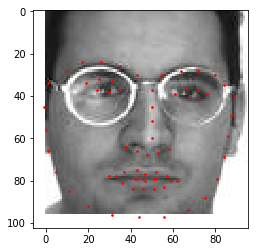

In [52]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [53]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


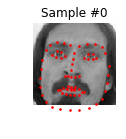

1 (96, 96) (68, 2)


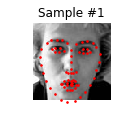

2 (96, 96) (68, 2)


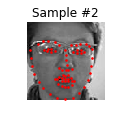

3 (96, 96) (68, 2)


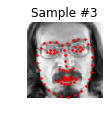

In [54]:
face_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                    root_dir='dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [55]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 68x68 и вырежем случайную область 60x60

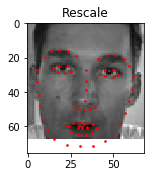

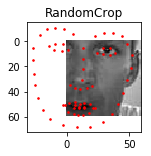

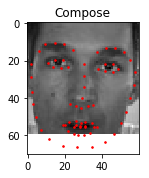

In [56]:
scale = Rescale(68)
crop = RandomCrop(60)
composed = transforms.Compose([Rescale(68),
                               RandomCrop(60)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [58]:
transformed_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                           root_dir='dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


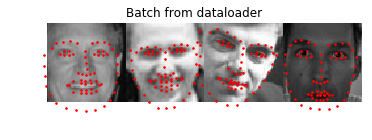

In [59]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv("dataset/train/face_landmarks.csv")

# Profiling

### В модуле ``torch.autograd.profiler`` реализованы методы для замера времени исполнения различных операций в PyTorch

In [48]:
x = Variable(torch.randn((1, 1)), requires_grad=True)
with torch.autograd.profiler.profile() as prof:
    y = x ** 2
    y.backward()

In [49]:
print(prof)

-----------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------
Name                                        CPU time        CUDA time            Calls        CPU total       CUDA total
-----------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------
pow                                         22.103us          0.000us                1         22.103us          0.000us
torch::autograd::GraphRoot                   0.972us          0.000us                1          0.972us          0.000us
PowBackward0                                34.318us          0.000us                1         34.318us          0.000us
mul                                          6.094us          0.000us                1          6.094us          0.000us
pow                                         10.614us          0.000us                1         10.614us          0.000us
mul                             